In [1]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32623 sha256=0e1a3fe307577c83bc58481b73325f48caec818ecad73048d6a73e7fd948eb16
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [2]:
# Setup and define function for parsing
from tika import parser
def convertPdf2TxtWithTika(in_pdf_file, out_text_file):
    # Load a file and extract information
    print ("INFO: - reading file = " + in_pdf_file)

    raw = parser.from_file(in_pdf_file)
    text = raw['content']

    ## Post-processing explained at:
    # https://medium.com/@justinboylantoomey/fast-text-extraction-with-python-and-tika-41ac34b0fe61
    # Convert to string
    text = str(text)
    # Ensure text is utf-8 formatted
    safe_text = text.encode('utf-8', errors='ignore')
    # Escape any \ issues
    safe_text = str(safe_text).replace('\\', '\\\\').replace('"', '\\"')

    # Write out extracted content
    text_pdf = open(out_text_file, 'w')
    print ("INFO: - writing file = " + out_text_file)
    text_pdf.write(text)
    text_pdf.close()

In [5]:
!pwd

/content


In [24]:
# Find pdf files in a directory and process its content
import os
import glob

txtfiles = []
inpath = '/content/data/input/'
outpath = '/content/data/output/'
count = 0
for file in glob.glob(inpath + 'Nayeem*.pdf'):
    justfile = os.path.basename(file)
    justfile = justfile.replace(".pdf","")
    print('INFO: processing file = ' + os.path.basename(file))
    output_file = outpath + justfile + '.txt'
    print('INFO: - in = ' + file + ', out = ' + output_file)
    convertPdf2TxtWithTika(file, output_file)
    count = count + 1
print('INFO: processed total files = ' + str(count))

INFO: processing file = Nayeem Mohammad.pdf
INFO: - in = /content/data/input/Nayeem Mohammad.pdf, out = /content/data/output/Nayeem Mohammad.txt
INFO: - reading file = /content/data/input/Nayeem Mohammad.pdf
INFO: - writing file = /content/data/output/Nayeem Mohammad.txt
INFO: processed total files = 1


In [26]:
# Now we define a function to do word cloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


In [37]:
# Open file and get content for one as a sanity check
file = 'data/output/Nayeem Mohammad.txt'
file_handle = open(file, 'r')
content = str( file_handle.read()).split()
file_handle.close()

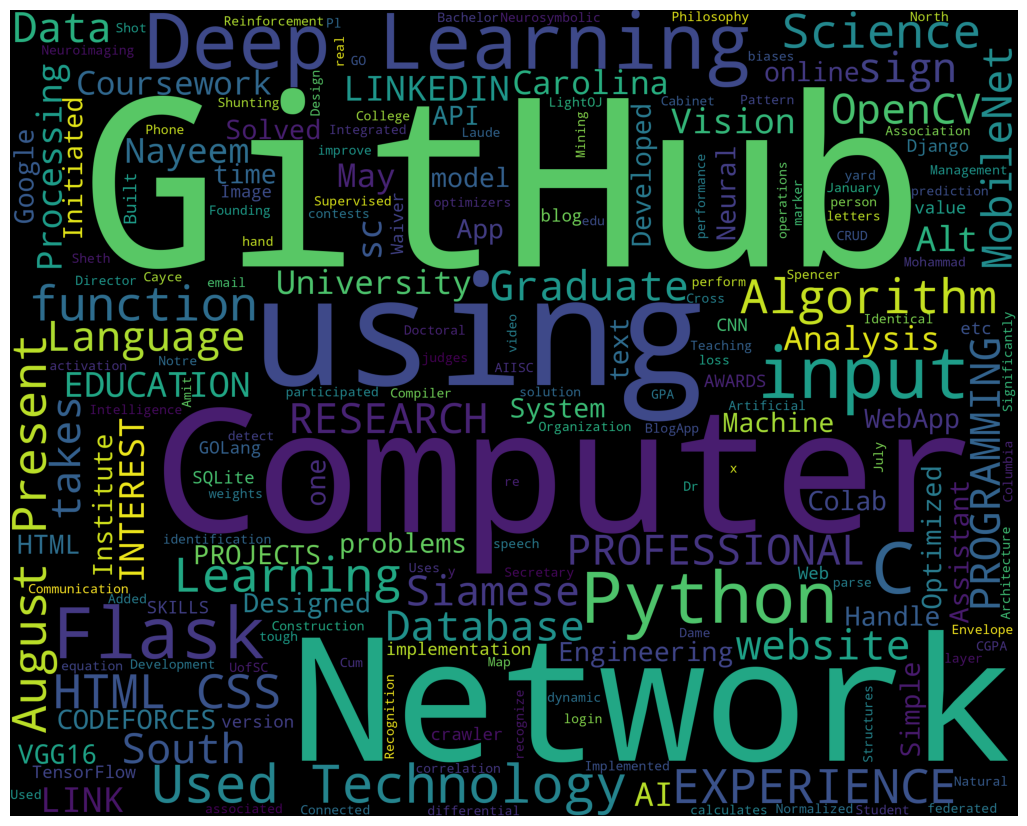

In [28]:
# Draw the visualization
wordcloud_draw(content)

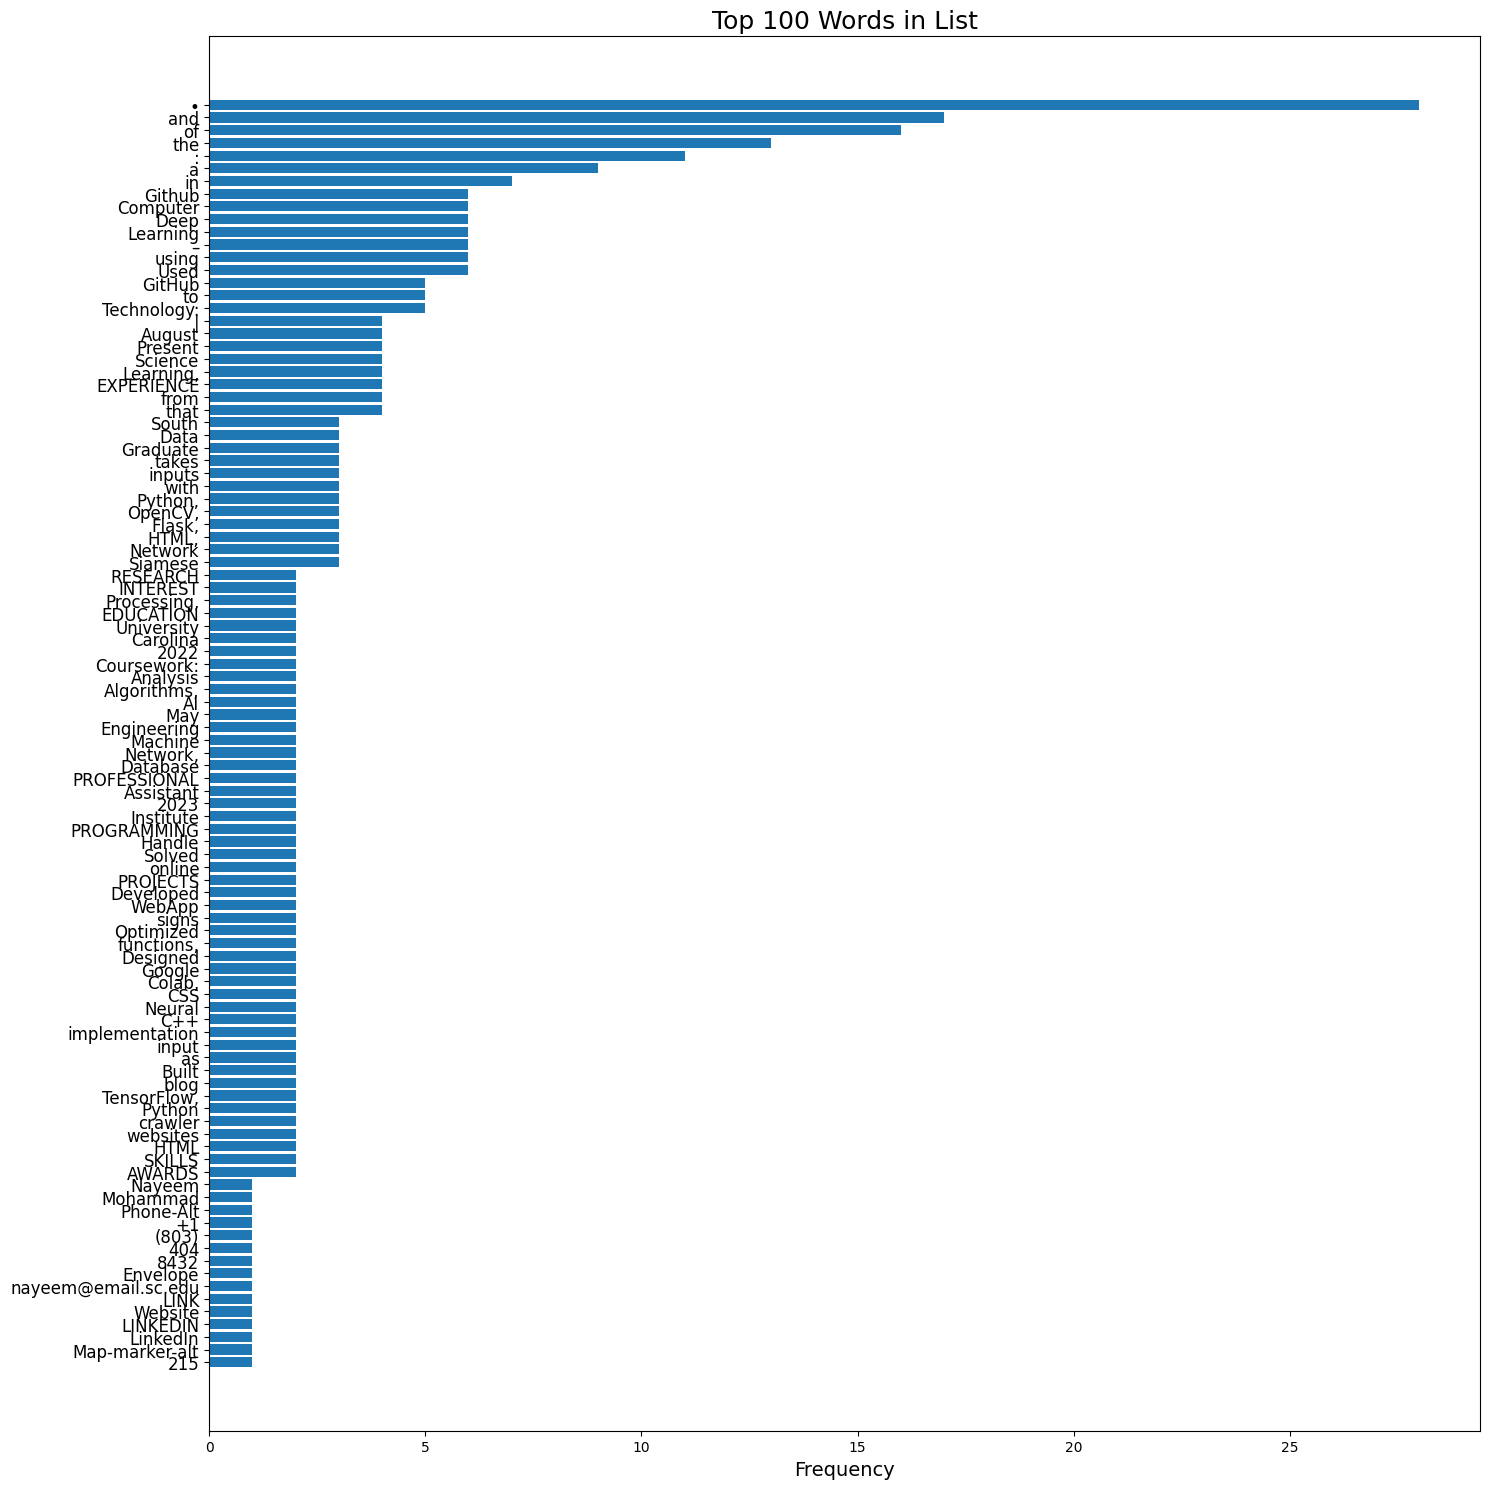

In [38]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming all_content is already a list of words (split and lowercased)

# Count word frequencies
word_counts = Counter(content)

# Get the 100 most common words
top_100_words = word_counts.most_common(100)

# Unzip the list of tuples into two lists: words and their counts
words, counts = zip(*top_100_words)

# Plot the histogram
plt.figure(figsize=(15, 15))  # Increase the figure size to make room for labels
plt.barh(words, counts, height=0.8)  # Increase the height of bars
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 100 Words in List', fontsize=18)

# Increase the font size of y-axis labels
plt.yticks(fontsize=12)

# Invert y-axis to show the most frequent words at the top
plt.gca().invert_yaxis()

# Add padding to avoid cutting off y-axis labels
plt.tight_layout()

plt.show()

In [39]:
# save the plt in png
plt.savefig('histogram_of_my_resume.png')

<Figure size 640x480 with 0 Axes>

In [40]:
txtfiles = []
inpath = '/content/data/input/'
outpath = '/content/data/output/'
count = 0
for file in glob.glob(inpath + '*.pdf'):
    justfile = os.path.basename(file)
    justfile = justfile.replace(".pdf","")
    print('INFO: processing file = ' + os.path.basename(file))
    output_file = outpath + justfile + '.txt'
    print('INFO: - in = ' + file + ', out = ' + output_file)
    convertPdf2TxtWithTika(file, output_file)
    count = count + 1
print('INFO: processed total files = ' + str(count))


# Now we define a function to do word cloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


# Get content in all files into one string
pathFilesToUse = 'data/output/'

all_content = ''
count = 0
for file in glob.glob(pathFilesToUse + '*.txt'):
    print("file = " + file)
    file_handle = open(file, 'r')
    content = str( file_handle.read()).split()
    #content_as_str = " ".join(sorted(set(content), key=content.index))
    # Has duplicates
    content_as_str = " ".join(content)
    # All together
    all_content = all_content + content_as_str
    #all_content.append(content)
    count = count + 1
    file_handle.close()

print('INFO: processed total files = ' + str(count))

INFO: processing file = Jordan_Wood_Resume.pdf
INFO: - in = /content/data/input/Jordan_Wood_Resume.pdf, out = /content/data/output/Jordan_Wood_Resume.txt
INFO: - reading file = /content/data/input/Jordan_Wood_Resume.pdf
INFO: - writing file = /content/data/output/Jordan_Wood_Resume.txt
INFO: processing file = Jacob T. Frierson Resume.pdf
INFO: - in = /content/data/input/Jacob T. Frierson Resume.pdf, out = /content/data/output/Jacob T. Frierson Resume.txt
INFO: - reading file = /content/data/input/Jacob T. Frierson Resume.pdf
INFO: - writing file = /content/data/output/Jacob T. Frierson Resume.txt
INFO: processing file = CS Resume.pdf
INFO: - in = /content/data/input/CS Resume.pdf, out = /content/data/output/CS Resume.txt
INFO: - reading file = /content/data/input/CS Resume.pdf
INFO: - writing file = /content/data/output/CS Resume.txt
INFO: processing file = August 2024 Ryan Karbowniczak Resume.pdf
INFO: - in = /content/data/input/August 2024 Ryan Karbowniczak Resume.pdf, out = /content

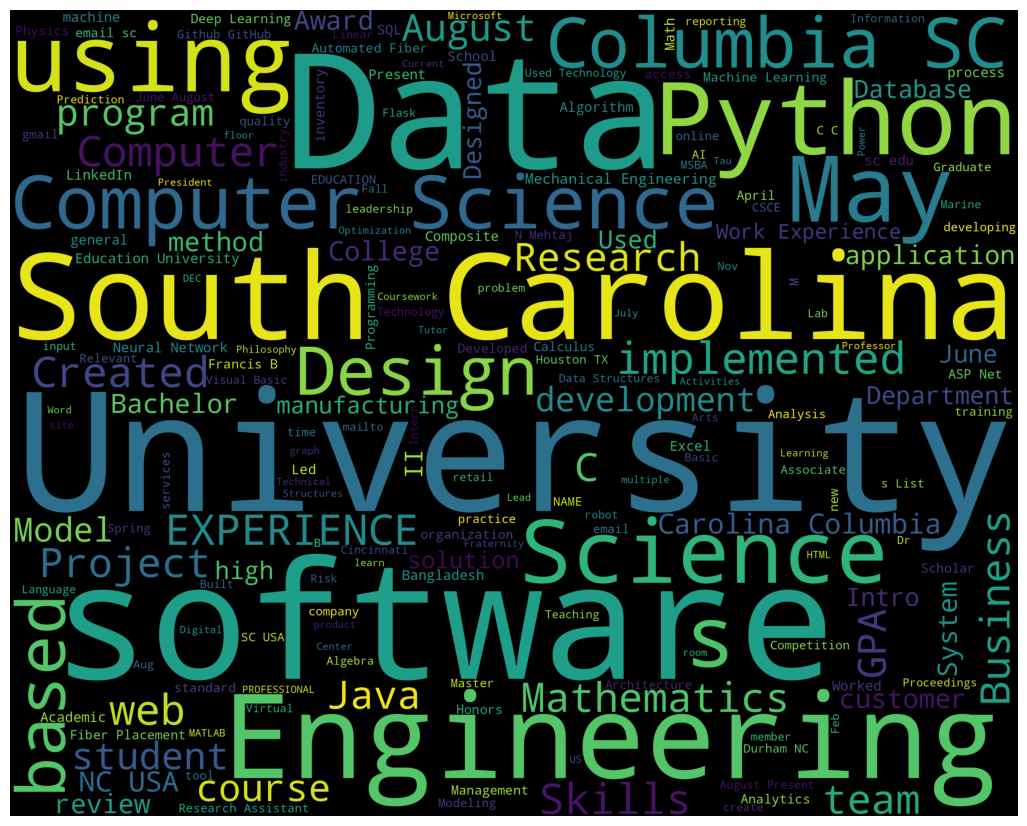

In [34]:
# Now do word tag cloud
wordcloud_draw(all_content.split())

<ipython-input-41-6299197a9b9e>:27: UserWarning: Glyph 61623 (\uf0b7) missing from current font.
  plt.tight_layout()
<ipython-input-41-6299197a9b9e>:30: UserWarning: Glyph 61623 (\uf0b7) missing from current font.
  plt.savefig('all_resumes_histo.png')


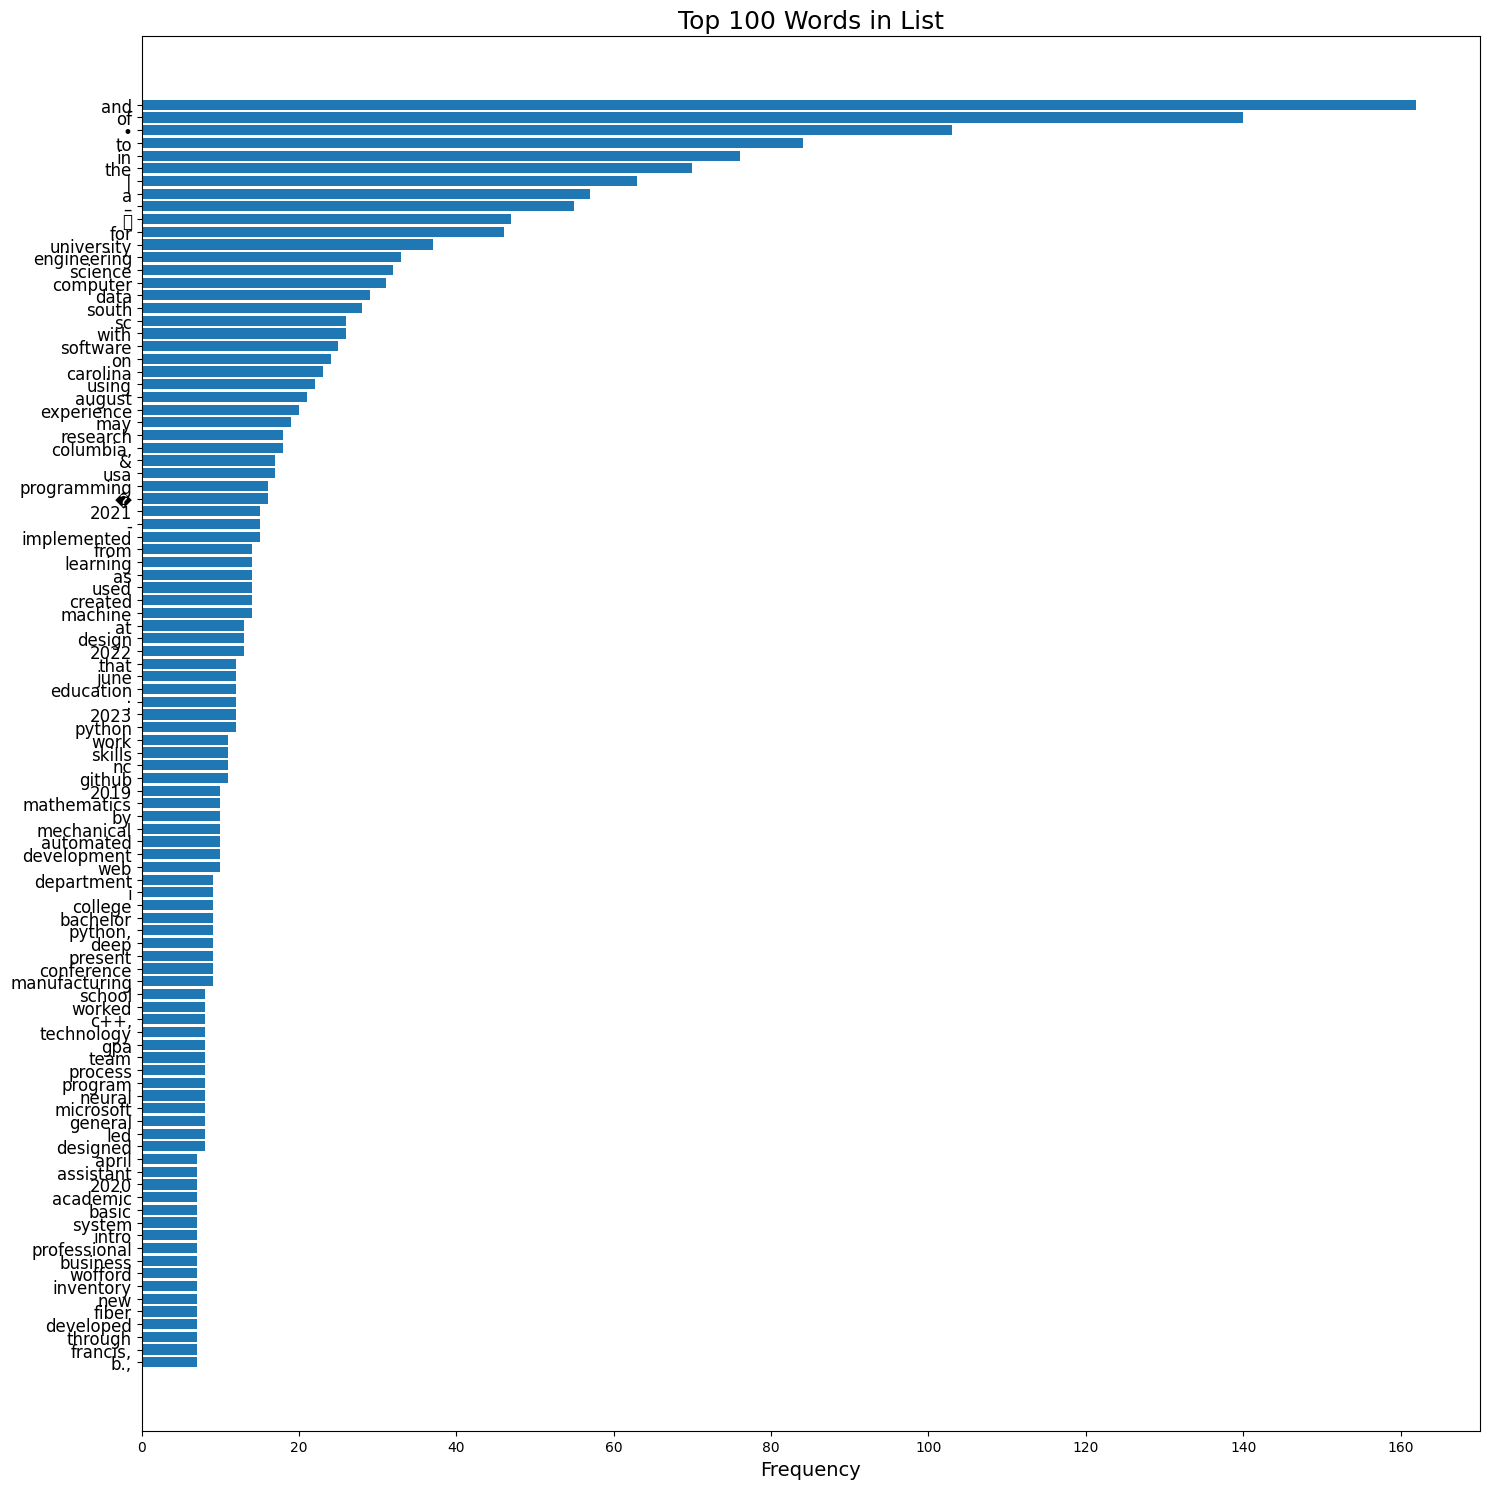

In [41]:
all_content = all_content.split()
all_content = [x.lower() for x in all_content]
all_content

# Count word frequencies
word_counts = Counter(all_content)

# Get the 100 most common words
top_100_words = word_counts.most_common(100)

# Unzip the list of tuples into two lists: words and their counts
words, counts = zip(*top_100_words)

# Plot the histogram
plt.figure(figsize=(15, 15))  # Increase the figure size to make room for labels
plt.barh(words, counts, height=0.8)  # Increase the height of bars
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 100 Words in List', fontsize=18)

# Increase the font size of y-axis labels
plt.yticks(fontsize=12)

# Invert y-axis to show the most frequent words at the top
plt.gca().invert_yaxis()

# Add padding to avoid cutting off y-axis labels
plt.tight_layout()

# save the plt in png
plt.savefig('all_resumes_histo.png')

plt.show()
